<a href="https://colab.research.google.com/github/bhargav1907/Coursera_Capstone/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will be mainly used for the capstone project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
df1 = pd.read_csv('/content/drive/My Drive/My Projects and Case Studies/Cousera Capstone/Data-Collisions.csv')
df = df1.copy()
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,84811,5638,194673.000000,194673,189769,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673,188344,194673.000000,194673,29805,189789,189592,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,2,1,NaN,2,10,NaN,NaN,NaN,NaN,5985,162058,7,NaN,39,1,4,11,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",NaN,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,79173,5638,NaN,136485,47987,NaN,NaN,NaN,NaN,96,96,89800,NaN,85209,29805,100274,111135,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,NaN,NaN,1.298901,NaN,NaN,2.444427,0.037139,0.028391,1.920780,NaN,NaN,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,NaN,NaN,0.457778,NaN,NaN,1.345929,0.198150,0.167413,0.631047,NaN,NaN,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [5]:
print(df['WEATHER'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())
# ,'ROADCOND','LIGHTCOND'

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, d

In [6]:
d1 = df[df['WEATHER']!='Unknown']
d2 = d1[d1['ROADCOND']!='Unknown']
df = d2[d2['LIGHTCOND']!='Unknown']
df.head()
#drop_index = d3.index
#drop_index

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
df['ADDRTYPE'].value_counts()
#isnull().sum()
#value_counts()

Block           111321
Intersection     63008
Alley              603
Name: ADDRTYPE, dtype: int64

# EDA

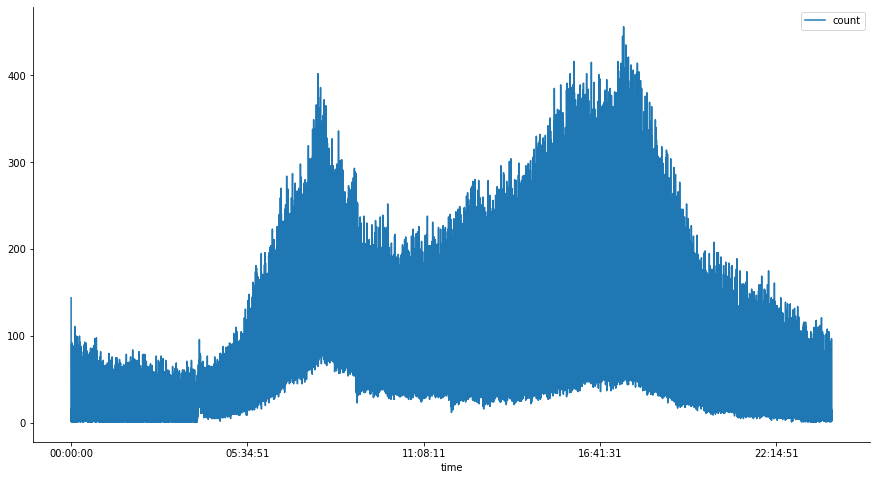

In [19]:
# No of accidents based on 24 hr clock
df['TIME'] = pd.to_datetime(df['Start_Time'],format = '%Y-%m-%d %H:%M:%S').dt.time # Show Code
count = df.groupby('TIME')[['TIME']].count()
count.columns= ['time']
count.reset_index(inplace=True)
count.columns= ['time','count']
ax = count.plot('time', 'count', figsize=(15,8))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

# Data Pre-processing

In [8]:
con = ['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE']
dfc = df[con]
dfc = dfc.dropna(axis=0)
dfc.shape

(169781, 5)

In [9]:
for i in ['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE']:
  print(i,len(dfc[i].unique()),dfc[i].unique())

WEATHER 10 ['Overcast' 'Raining' 'Clear' 'Snowing' 'Other' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
ROADCOND 8 ['Wet' 'Dry' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt' 'Standing Water'
 'Oil']
LIGHTCOND 8 ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Dusk'
 'Dawn' 'Dark - Street Lights Off' 'Other' 'Dark - Unknown Lighting']
ADDRTYPE 3 ['Intersection' 'Block' 'Alley']


In [10]:
dfc.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE
0,2,Overcast,Wet,Daylight,Intersection
1,1,Raining,Wet,Dark - Street Lights On,Block
2,1,Overcast,Dry,Daylight,Block
3,1,Clear,Dry,Daylight,Block
4,2,Raining,Wet,Daylight,Intersection


In [11]:
dfc[dfc['WEATHER']=='Raining']['SEVERITYCODE'].value_counts()

1    21518
2    11081
Name: SEVERITYCODE, dtype: int64

In [12]:
# One Hot Encoding
dfc = pd.get_dummies(dfc,drop_first=True)
print(dfc.shape)
dfc.head()

(169781, 26)


,SEVERITYCODE,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,ADDRTYPE_Block,ADDRTYPE_Intersection
0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


# Classification Models

In [49]:
X = dfc.iloc[:,1:].values
Y = dfc.iloc[:,0].values
Y[:5]

array([2, 1, 1, 1, 2])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(135824, 25)
(33957, 25)
(135824,)
(33957,)


In [38]:
# Decision TREE Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#for i in range(3,16):
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(X_train, Y_train)
print(metrics.accuracy_score(Y_test, DT.predict(X_test)))
yhat_prob = DT.predict_proba(X_test)
from sklearn.metrics import log_loss
print(log_loss(Y_test, yhat_prob))
#print('Tree depth:',i,', Accuracy:',metrics.accuracy_score(Y_test, clf.predict(X_test)))

0.6710251200047118
0.6177134238830805


In [34]:
from sklearn.metrics import classification_report as clrpt
from sklearn.metrics import confusion_matrix as cmx
print(clrpt(Y_test, DT.predict(X_test)))
cmx(Y_test, DT.predict(X_test))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80     22786
           2       0.50      0.00      0.00     11171

    accuracy                           0.67     33957
   macro avg       0.59      0.50      0.40     33957
weighted avg       0.61      0.67      0.54     33957



array([[22784,     2],
       [11169,     2]])

In [55]:
# Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy:',metrics.accuracy_score(Y_test, gnb.predict(X_test)))
yhat_prob = gnb.predict_proba(X_test)
print('Log loss:',log_loss(Y_test, yhat_prob))

Accuracy: 0.612185999941102
Log loss: 0.9250264056462486


In [52]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, Y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import log_loss
print('Accuracy:',metrics.accuracy_score(Y_test, yhat))
print('Log loss:',log_loss(Y_test, yhat_prob))

Accuracy: 0.6710251200047118
Log loss: 0.6181689137802303


In [53]:
#### RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC()
rf.fit(X_train,Y_train)
print('Accuracy:',metrics.accuracy_score(Y_test, rf.predict(X_test)))
yhat_prob = rf.predict_proba(X_test)
print('Log loss:',log_loss(Y_test, yhat_prob))

Accuracy: 0.6707895279323851
Log loss: 0.6221167084500857
